# 1. Import Libraries

In [1]:
#Data Cleaning
import numpy as np
import pandas as pd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime

print("Libraries are imported successfully!")

Libraries are imported successfully!


# 2. Import Dataset

In [2]:
dataset = pd.read_csv('cyclistic_dataset.csv')

print("The dataset are imported successfully!")

dataset.head()

The dataset are imported successfully!


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,start_hour,start_day_num,start_day_name,day_of_year,start_month_num,start_month_name,start_year,ride_length,ride_distance,weekend
0,D8EEE72183269F07,classic_bike,2023-01-01 00:02:06,2023-01-01 00:29:46,Fairbanks Ct & Grand Ave,TA1305000003,New St & Illinois St,TA1306000013,41.891847,-87.620580,...,0,6,Sunday,1,1,January,2023,27.666667,0.244897,True
1,8FBD2AD70B0F6A6F,classic_bike,2023-01-01 00:04:07,2023-01-01 00:13:56,Leavitt St & Lawrence Ave,TA1309000015,Broadway & Argyle St,13108,41.968885,-87.684001,...,0,6,Sunday,1,1,January,2023,9.816667,2.760164,True
2,B05BD052B9EBB767,electric_bike,2023-01-01 00:04:27,2023-01-01 00:16:52,Clark St & Montrose Ave,KA1503000022,Clark St & Montrose Ave,KA1503000022,41.961545,-87.666189,...,0,6,Sunday,1,1,January,2023,12.416667,0.017714,True
3,27C2A67184C49D01,electric_bike,2023-01-01 00:05:43,2023-01-01 00:21:37,Wabash Ave & Grand Ave,TA1307000117,Streeter Dr & Grand Ave,13022,41.891505,-87.626863,...,0,6,Sunday,1,1,January,2023,15.900000,1.649280,True
4,776F6B226016E50A,classic_bike,2023-01-01 00:06:03,2023-01-01 00:29:39,Fairbanks Ct & Grand Ave,TA1305000003,New St & Illinois St,TA1306000013,41.891847,-87.620580,...,0,6,Sunday,1,1,January,2023,23.600000,0.244897,True


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3667748 entries, 0 to 3667747
Data columns (total 23 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  user_type           object 
 13  start_hour          int64  
 14  start_day_num       int64  
 15  start_day_name      object 
 16  day_of_year         int64  
 17  start_month_num     int64  
 18  start_month_name    object 
 19  start_year          int64  
 20  ride_length         float64
 21  ride_distance       float64
 22  weekend             bool   
dtypes: bool(1), float64(6), int64(5), object(11)
memory usage

# 3. Exploratory Data Analysis

# 3.1. Analyzing number of rides between user type

In [4]:
#Count the number of rides between user type
user_type = dataset.groupby("user_type")["ride_id"].count()
df_user_type = pd.DataFrame(user_type).reset_index()
column_name = ["User Type", "Total"]
df_user_type.columns = column_name
df_user_type

,User Type,Total
0,casual,1307773
1,member,2359975


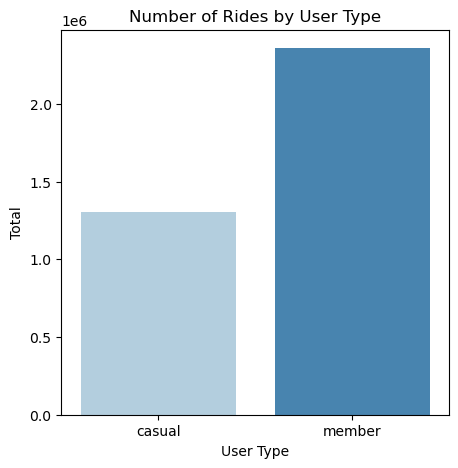

In [5]:
fig, (ax1) = plt.subplots(1, figsize=(5, 5))
sns.barplot(data = df_user_type, x = "User Type", y = "Total", ax = ax1, palette = "Blues")
ax1.set_title("Number of Rides by User Type")

plt.show()

# 3.2. Analyzing number of rides based on months and user type

In [6]:
#Count the number of rides based on months
rides_of_month = dataset.groupby(["start_month_name", "user_type"])["ride_id"].count().reset_index()
rides_of_month['start_month_name'] = pd.Categorical(rides_of_month['start_month_name'], categories=list(calendar.month_name), ordered=True)
rides_of_month = rides_of_month.sort_values(by='start_month_name')

pivot_table = rides_of_month.pivot(index='start_month_name', columns='user_type', values='ride_id').reset_index()

pivot_table.columns = ['Month', 'Casual', 'Member']

print(pivot_table)

        Month  Casual  Member
0     January   23494   93704
1    February   26031   92193
2       March   37770  123418
3       April   92623  178051
4         May  151601  242884
5        June  189756  270886
6        July  213368  284029
7      August  204308  305529
8   September  170128  266265
9     October  109856  231057
10   November   59299  166913
11   December   29539  105046


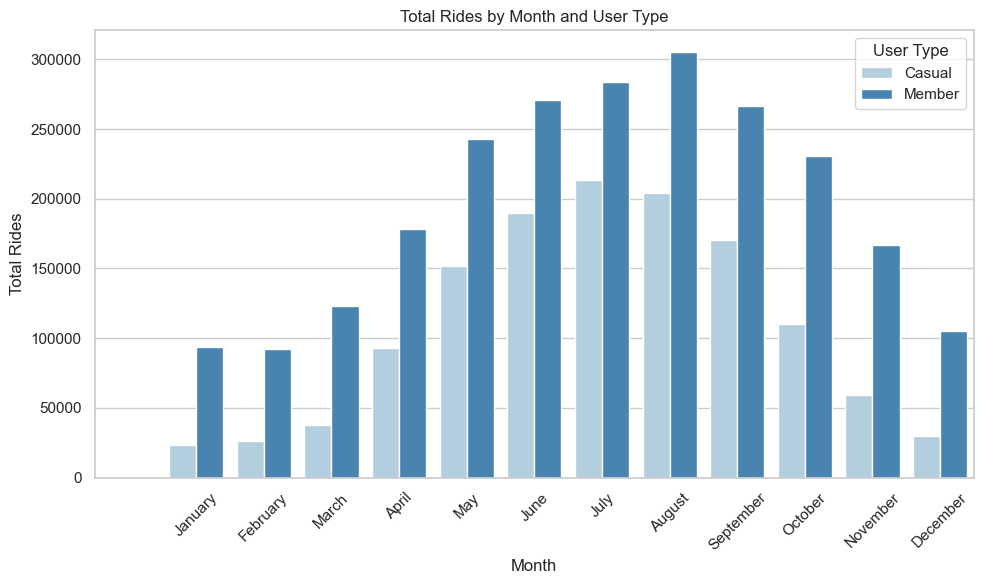

In [7]:
sns.set(style = "whitegrid")

plt.figure(figsize = (10, 6))
sns.barplot(x = 'Month', y = 'Total', hue = 'User Type', data = pivot_table.melt(id_vars = 'Month', var_name = 'User Type', value_name = 'Total'), palette = "Blues")
plt.title('Total Rides by Month and User Type')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# 3.3. Analyzing number of rides based on days and user type

In [8]:
#Count the number of rides based on days
rides_of_days = dataset.groupby(["start_day_name", "user_type"])["ride_id"].count().reset_index()
rides_of_days['start_day_name'] = pd.Categorical(rides_of_days['start_day_name'], categories=list(calendar.day_name), ordered=True)
rides_of_days = rides_of_days.sort_values(by='start_day_name')

pivot_table = rides_of_days.pivot(index='start_day_name', columns='user_type', values='ride_id').reset_index()

pivot_table.columns = ['Day', 'Casual', 'Member']

print(pivot_table)

         Day  Casual  Member
0     Monday  149613  325763
1    Tuesday  154646  378071
2  Wednesday  156114  381676
3   Thursday  169654  381106
4     Friday  194983  337903
5   Saturday  265323  295839
6     Sunday  217440  259617


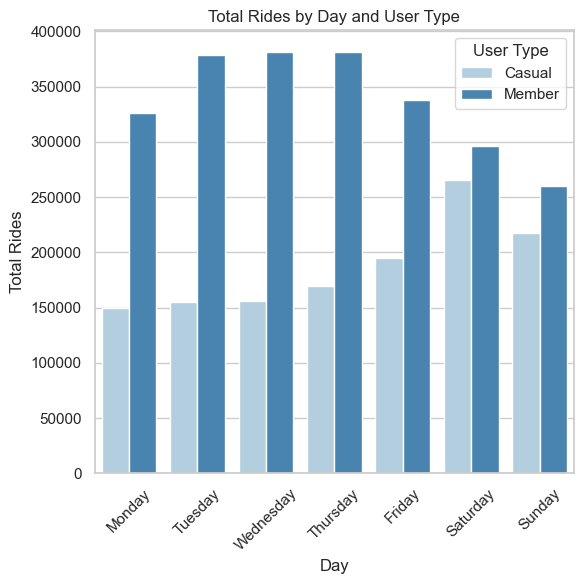

In [9]:
sns.set(style = "whitegrid")

plt.figure(figsize = (6, 6))
sns.barplot(x = 'Day', y = 'Total', hue = 'User Type', data = pivot_table.melt(id_vars = 'Day', var_name = 'User Type', value_name = 'Total'), palette = "Blues")
plt.title('Total Rides by Day and User Type')
plt.xlabel('Day')
plt.ylabel('Total Rides')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# 3.4. Analyzing number of rides based on hours and user type

In [10]:
#Count the number of rides based on hours
rides_of_hour = dataset.groupby(["start_hour", "user_type"])["ride_id"].count().reset_index()
start_hour = sorted(dataset["start_hour"].unique())
rides_of_hour['start_hour'] = pd.Categorical(rides_of_hour['start_hour'], categories=start_hour, ordered=True)
rides_of_hour = rides_of_hour.sort_values(by='start_hour')

pivot_table = rides_of_hour.pivot(index='start_hour', columns='user_type', values='ride_id').reset_index()

pivot_table.columns = ['Hour', 'Casual', 'Member']

print(pivot_table)

   Hour  Casual  Member
0     0   21235   19902
1     1   13686   11421
2     2    7915    6220
3     3    3998    3950
4     4    3077    4858
5     5    6948   22471
6     6   18935   71433
7     7   33255  133490
8     8   45129  163816
9     9   45188  107151
10   10   57385   95715
11   11   72668  112960
12   12   85814  128511
13   13   89075  127245
14   14   92521  128619
15   15  101698  158908
16   16  118063  218073
17   17  128653  255884
18   18  108454  198765
19   19   79487  138352
20   20   56678   95199
21   21   46780   72313
22   22   41414   52315
23   23   29717   32404


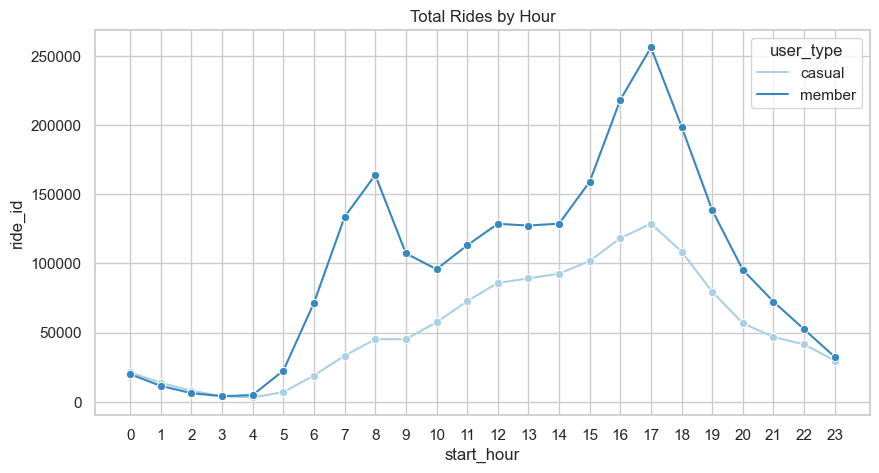

In [11]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=rides_of_hour, x="start_hour", y="ride_id", hue="user_type", palette="Blues", marker='o')
ax.set_xticks(list(range(0, 24)))
plt.rcParams["figure.figsize"] = (10, 5)
plt.title("Total Rides by Hour")
plt.show()

# 3.5. Analyzing number of rides based on bike type

In [12]:
#Count the number of rides based on bike type
bike_type = dataset.groupby("rideable_type")["ride_id"].count()
df_bike_type = pd.DataFrame(bike_type).reset_index()
column_name1 = ["Bike Type", "Total"]
df_bike_type.columns = column_name1
df_bike_type

,Bike Type,Total
0,classic_bike,2290406
1,docked_bike,65096
2,electric_bike,1312246


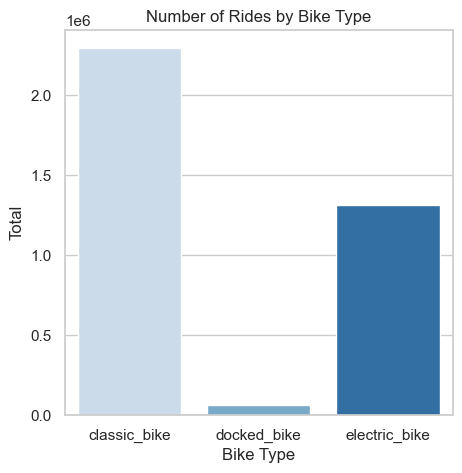

In [13]:
fig, (ax2) = plt.subplots(1, figsize=(5, 5))
sns.barplot(data = df_bike_type, x = "Bike Type", y = "Total", ax = ax2, palette = "Blues")
ax2.set_title("Number of Rides by Bike Type")

plt.show()

# 3.6. Analyzing number of rides based on bike type and user type

In [14]:
#Count the number of rides based on bike type and user type
rides_of_bike = dataset.groupby(["rideable_type", "user_type"])["ride_id"].count().reset_index()
rides_of_bike['rideable_type'] = pd.Categorical(rides_of_bike['rideable_type'])
rides_of_bike = rides_of_bike.sort_values(by='rideable_type')

pivot_table = rides_of_bike.pivot(index='rideable_type', columns='user_type', values='ride_id').reset_index()

pivot_table.columns = ['Bike Type', 'Casual', 'Member']

print(pivot_table)

       Bike Type    Casual     Member
0   classic_bike  748379.0  1542027.0
1    docked_bike   65096.0        NaN
2  electric_bike  494298.0   817948.0


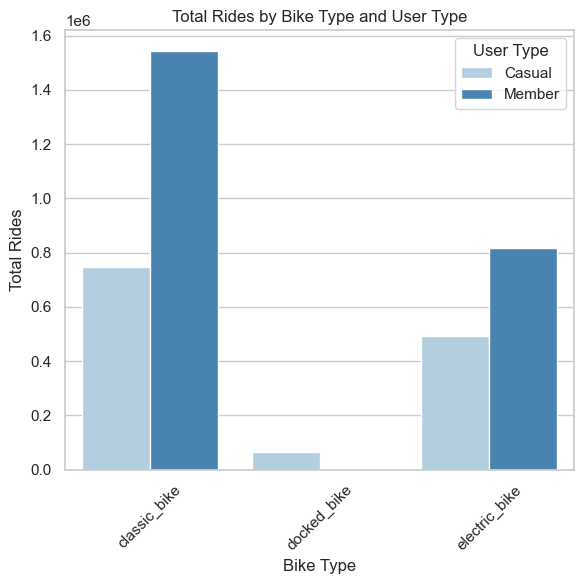

In [15]:
sns.set(style = "whitegrid")

plt.figure(figsize = (6, 6))
sns.barplot(x = 'Bike Type', y = 'Total', hue = 'User Type', data = pivot_table.melt(id_vars = 'Bike Type', var_name = 'User Type', value_name = 'Total'), palette = "Blues")
plt.title('Total Rides by Bike Type and User Type')
plt.xlabel('Bike Type')
plt.ylabel('Total Rides')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# 3.7. Analyzing average of ride length between user type

In [16]:
#Average the number of ride length between Casual and Member user type
user_type = dataset.groupby("user_type")["ride_length"].mean()
df_user_type = pd.DataFrame(user_type).reset_index()
column_name = ["User Type", "Avg. Ride Length (min)"]
df_user_type.columns = column_name
df_user_type

,User Type,Avg. Ride Length (min)
0,casual,21.592971
1,member,12.085300


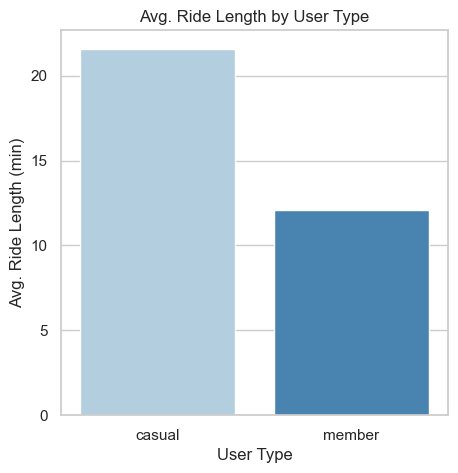

In [17]:
fig, (ax3) = plt.subplots(1, figsize=(5, 5))
sns.barplot(data = df_user_type, x = "User Type", y = "Avg. Ride Length (min)", ax = ax3, palette = "Blues")
ax3.set_title("Avg. Ride Length by User Type")

plt.show()

# 3.8. Analyzing average of ride length based on bike type

In [18]:
#Average the number of rides between Casual and Member user type
bike_type = dataset.groupby("rideable_type")["ride_length"].mean()
df_bike_type = pd.DataFrame(bike_type).reset_index()
column_name = ["Bike Type", "Avg. Ride Length (min)"]
df_bike_type.columns = column_name
df_bike_type

,Bike Type,Avg. Ride Length (min)
0,classic_bike,16.363921
1,docked_bike,44.874513
2,electric_bike,12.466060


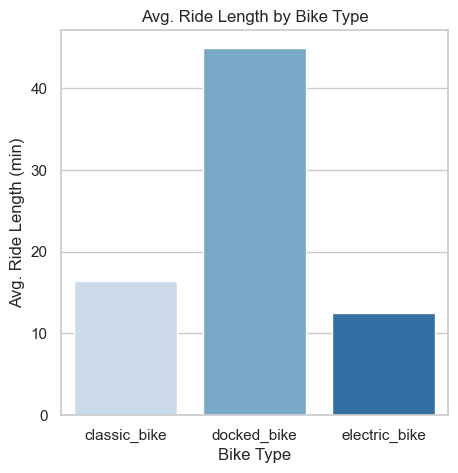

In [19]:
fig, (ax1) = plt.subplots(1, figsize=(5, 5))
sns.barplot(data = df_bike_type, x = "Bike Type", y = "Avg. Ride Length (min)", ax = ax1, palette = "Blues")
ax1.set_title("Avg. Ride Length by Bike Type")

plt.show()

# 3.9. Analyzing average of ride length based on bike type and user type

In [20]:
#Average the number of rides based on bike type and user type
avg_rides_of_bike = dataset.groupby(["rideable_type", "user_type"])["ride_length"].mean().reset_index()
avg_rides_of_bike['rideable_type'] = pd.Categorical(avg_rides_of_bike['rideable_type'])
avg_rides_of_bike = avg_rides_of_bike.sort_values(by='rideable_type')

pivot_table = avg_rides_of_bike.pivot(index='rideable_type', columns='user_type', values='ride_length').reset_index()

pivot_table.columns = ['Bike Type', 'Casual', 'Member']

print(pivot_table)

       Bike Type     Casual     Member
0   classic_bike  23.892590  12.710095
1    docked_bike  44.874513        NaN
2  electric_bike  15.045258  10.907413


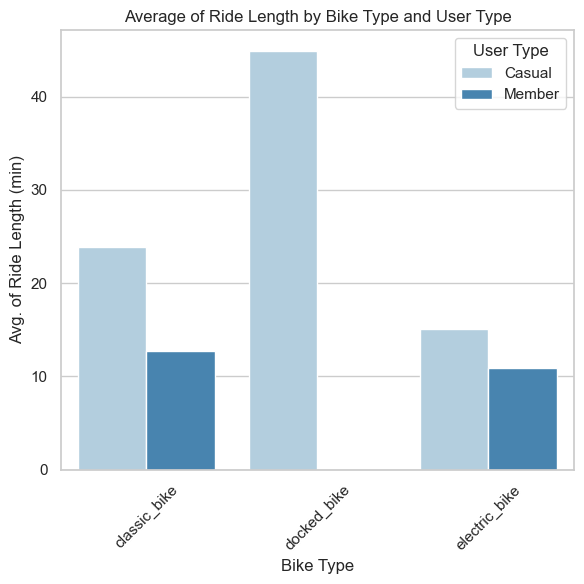

In [21]:
sns.set(style = "whitegrid")

plt.figure(figsize = (6, 6))
sns.barplot(x = 'Bike Type', y = 'Average of Ride Length', hue = 'User Type', data = pivot_table.melt(id_vars = 'Bike Type', var_name = 'User Type', value_name = 'Average of Ride Length'), palette = "Blues")
plt.title('Average of Ride Length by Bike Type and User Type')
plt.xlabel('Bike Type')
plt.ylabel('Avg. of Ride Length (min)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# 3.10. Analyzing average of ride length based on month and user type

In [22]:
#Average the number of rides based on months
avg_rides_of_month = dataset.groupby(["start_month_name", "user_type"])["ride_length"].mean().reset_index()
avg_rides_of_month['start_month_name'] = pd.Categorical(avg_rides_of_month['start_month_name'], categories=list(calendar.month_name), ordered=True)
avg_rides_of_month = avg_rides_of_month.sort_values(by='start_month_name')

pivot_table = avg_rides_of_month.pivot(index='start_month_name', columns='user_type', values='ride_length').reset_index()

pivot_table.columns = ['Month', 'Casual', 'Member']

print(pivot_table)

        Month     Casual     Member
0     January  13.592960   9.956857
1    February  16.157328  10.348335
2       March  15.510841  10.220902
3       April  21.107684  11.616372
4         May  23.227236  12.712189
5        June  22.748444  12.967524
6        July  23.871080  13.308576
7      August  22.595419  13.133549
8   September  22.311655  12.576311
9     October  19.884547  11.429945
10   November  16.602382  10.870899
11   December  15.078551  10.539296


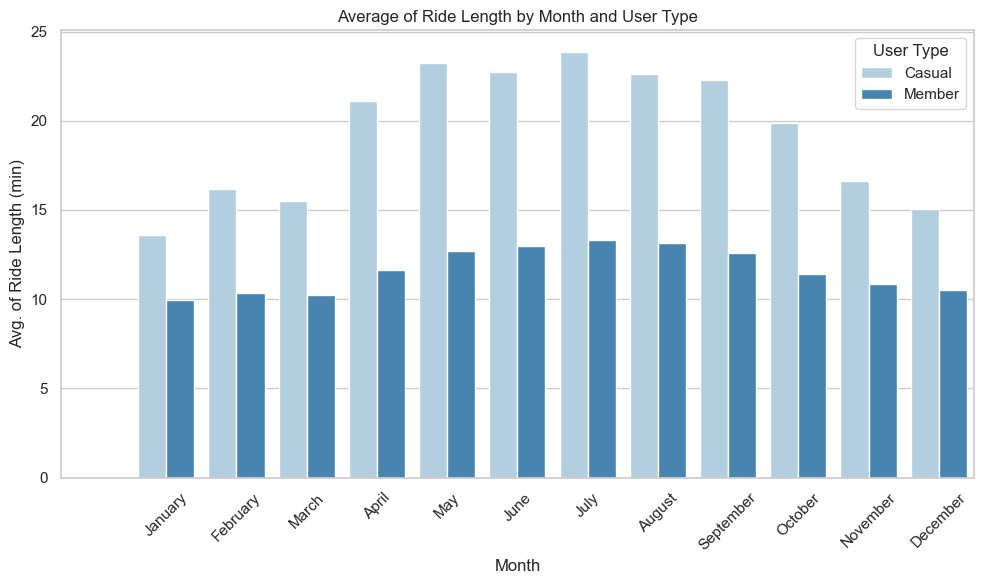

In [23]:
sns.set(style = "whitegrid")

plt.figure(figsize = (10, 6))
sns.barplot(x = 'Month', y = 'Average of Ride Length', hue = 'User Type', data = pivot_table.melt(id_vars = 'Month', var_name = 'User Type', value_name = 'Average of Ride Length'), palette = "Blues")
plt.title('Average of Ride Length by Month and User Type')
plt.xlabel('Month')
plt.ylabel('Avg. of Ride Length (min)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# 3.11. Analyzing average of ride length based on day and user type

In [24]:
#Average the number of rides based on days
avg_rides_of_days = dataset.groupby(["start_day_name", "user_type"])["ride_length"].mean().reset_index()
avg_rides_of_days['start_day_name'] = pd.Categorical(avg_rides_of_days['start_day_name'], categories=list(calendar.day_name), ordered=True)
avg_rides_of_days = avg_rides_of_days.sort_values(by='start_day_name')

pivot_table = avg_rides_of_days.pivot(index='start_day_name', columns='user_type', values='ride_length').reset_index()

pivot_table.columns = ['Day', 'Casual', 'Member']

print(pivot_table)

         Day     Casual     Member
0     Monday  21.375209  11.499288
1    Tuesday  19.366116  11.617805
2  Wednesday  18.284969  11.502982
3   Thursday  18.640805  11.620694
4     Friday  20.884370  11.951352
5   Saturday  24.582365  13.538443
6     Sunday  24.992699  13.557984


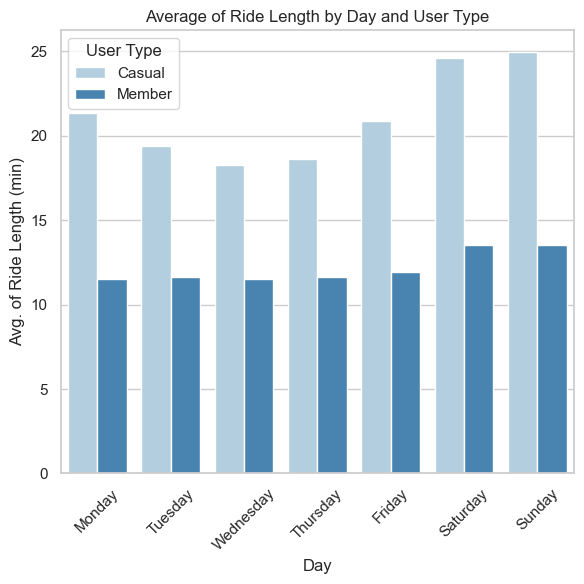

In [25]:
sns.set(style = "whitegrid")

plt.figure(figsize = (6, 6))
sns.barplot(x = 'Day', y = 'Average of Ride Length', hue = 'User Type', data = pivot_table.melt(id_vars = 'Day', var_name = 'User Type', value_name = 'Average of Ride Length'), palette = "Blues")
plt.title('Average of Ride Length by Day and User Type')
plt.xlabel('Day')
plt.ylabel('Avg. of Ride Length (min)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# 3.12. Analyzing average of ride length based on hour and user type

In [26]:
#Average the number of rides based on hours
avg_rides_of_hour = dataset.groupby(["start_hour", "user_type"])["ride_length"].mean().reset_index()
start_hour = sorted(dataset["start_hour"].unique())
avg_rides_of_hour['start_hour'] = pd.Categorical(avg_rides_of_hour['start_hour'], categories=start_hour, ordered=True)
avg_rides_of_hour = avg_rides_of_hour.sort_values(by='start_hour')

pivot_table = avg_rides_of_hour.pivot(index='start_hour', columns='user_type', values='ride_length').reset_index()

pivot_table.columns = ['Hour', 'Casual', 'Member']

print(pivot_table)

   Hour     Casual     Member
0     0  17.466838  11.289954
1     1  17.496146  11.639480
2     2  17.585607  11.650263
3     3  17.252305  12.312814
4     4  15.830138  11.975137
5     5  13.495898  10.187136
6     6  15.439880  10.577942
7     7  14.446060  10.942200
8     8  16.386151  11.078113
9     9  22.581183  11.352010
10   10  26.291520  12.144232
11   11  26.983605  12.334137
12   12  26.204467  12.194090
13   13  25.933978  12.191450
14   14  25.649105  12.488800
15   15  23.899507  12.420947
16   16  21.566925  12.589908
17   17  20.114203  12.824110
18   18  19.700986  12.657376
19   19  19.369283  12.423911
20   20  18.661152  12.055610
21   21  17.475901  11.747118
22   22  17.317059  11.775754
23   23  17.176855  11.687425


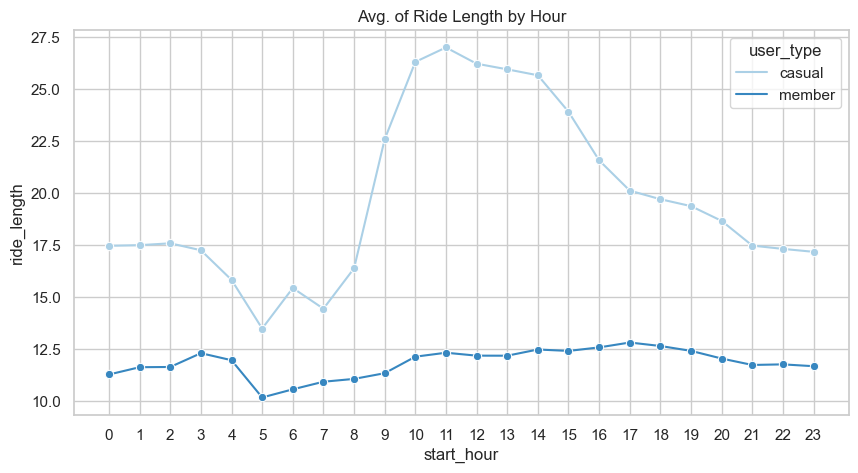

In [27]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=avg_rides_of_hour, x="start_hour", y="ride_length", hue="user_type", palette="Blues", marker='o')
ax.set_xticks(list(range(0, 24)))
plt.rcParams["figure.figsize"] = (10, 5)
plt.title("Avg. of Ride Length by Hour")
plt.show()

# 3.13. Analyzing the number of rides for weekend trends

In [28]:
#Count the number of rides for weekend trends
weekend = dataset.groupby("weekend")["ride_id"].count()
df_weekend = pd.DataFrame(weekend).reset_index()
column_name = ["Weekend?", "Total"]
df_weekend.columns = column_name
df_weekend

,Weekend?,Total
0,False,2629529
1,True,1038219


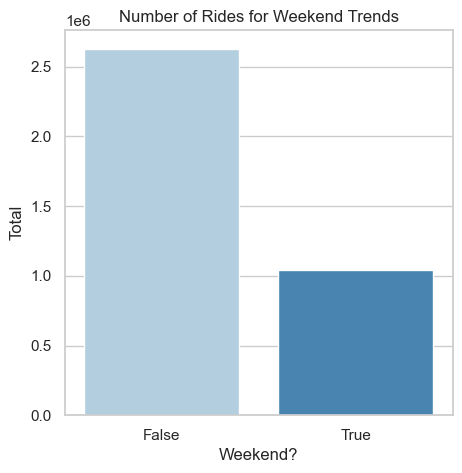

In [29]:
fig, (ax1) = plt.subplots(1, figsize=(5, 5))
sns.barplot(data = df_weekend, x = "Weekend?", y = "Total", ax = ax1, palette = "Blues")
ax1.set_title("Number of Rides for Weekend Trends")

plt.show()

# 3.14. Analyzing the average of ride length for weekend trends 

In [30]:
#Average the number of rides between Casual and Member user type
weekend = dataset.groupby("weekend")["ride_length"].mean()
df_weekend = pd.DataFrame(weekend).reset_index()
column_name = ["Weekend?", "Avg. Ride Length (min)"]
df_weekend.columns = column_name
df_weekend

,Weekend?,Avg. Ride Length (min)
0,False,14.176664
1,True,18.764598


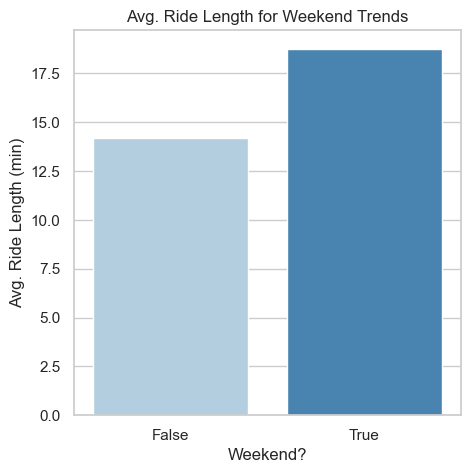

In [31]:
fig, (ax1) = plt.subplots(1, figsize=(5, 5))
sns.barplot(data = df_weekend, x = "Weekend?", y = "Avg. Ride Length (min)", ax = ax1, palette = "Blues")
ax1.set_title("Avg. Ride Length for Weekend Trends")

plt.show()

# 3.15. Analyzing the average of ride distance for weekend trends 

In [32]:
#Average the number of rides between Casual and Member user type
weekend = dataset.groupby("weekend")["ride_length"].mean()
df_weekend = pd.DataFrame(weekend).reset_index()
column_name = ["Weekend?", "Avg. Ride Distance (km)"]
df_weekend.columns = column_name
df_weekend

,Weekend?,Avg. Ride Distance (km)
0,False,14.176664
1,True,18.764598


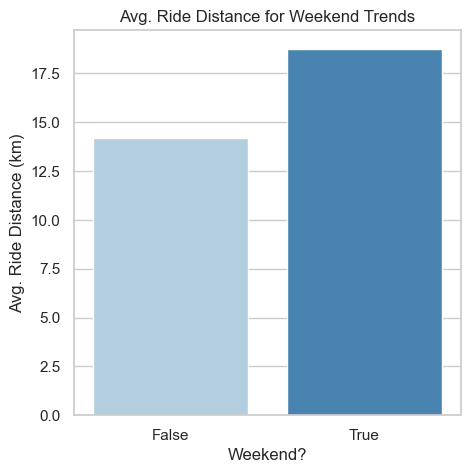

In [33]:
fig, (ax1) = plt.subplots(1, figsize=(5, 5))
sns.barplot(data = df_weekend, x = "Weekend?", y = "Avg. Ride Distance (km)", ax = ax1, palette = "Blues")
ax1.set_title("Avg. Ride Distance for Weekend Trends")

plt.show()

# 3.16. Top 10 Popular and Unpopular Stations Over Time

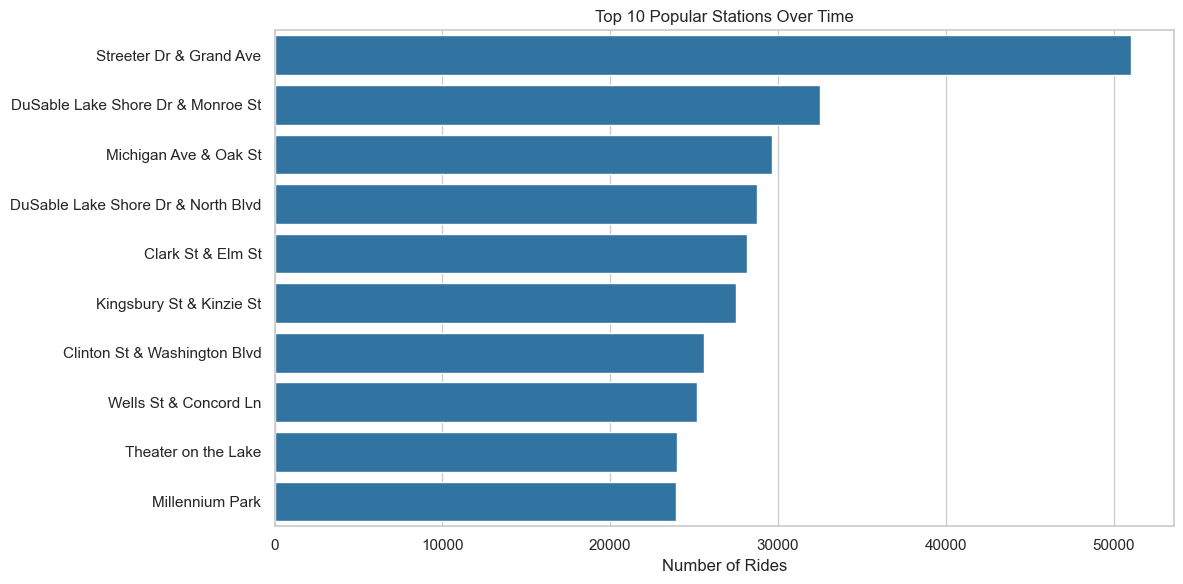

In [34]:
#Color
color_blue = '#1f77b4'

#Get the top 10 popular stations over time
pop_start_stations = dataset['start_station_name'].value_counts().nlargest(10)

#Create bar plot for the top 10 popular stations over time
plt.figure(figsize=(12, 6))
sns.barplot(x=pop_start_stations.values, y=pop_start_stations.index, color=color_blue)
plt.xlabel('Number of Rides')
plt.title('Top 10 Popular Stations Over Time')
plt.tight_layout()
plt.show()

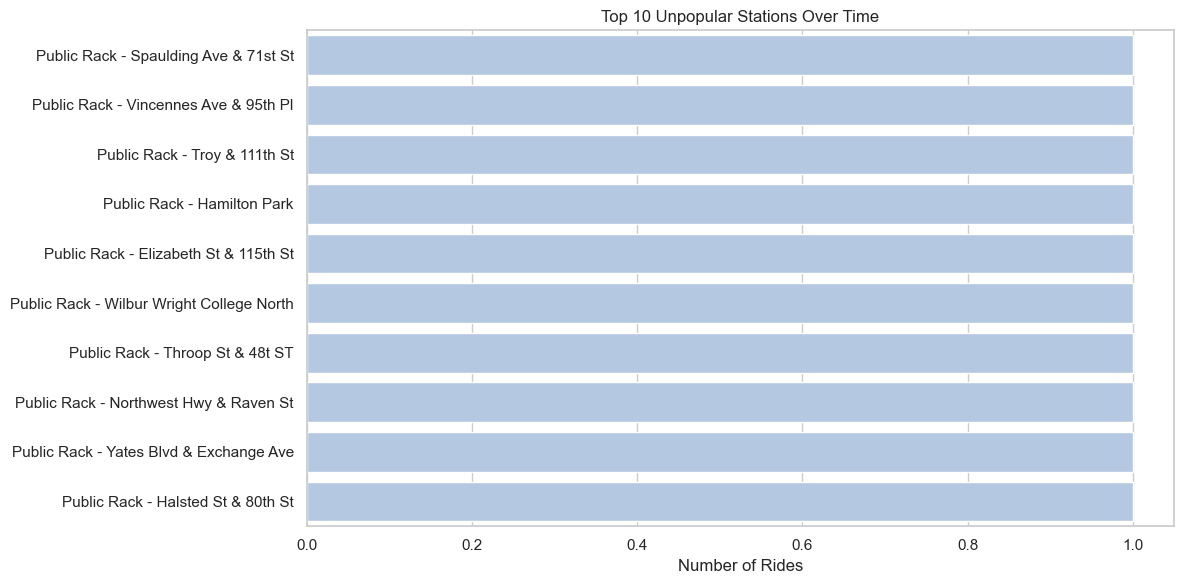

In [35]:
#Color
color_blue = '#aec7e8'

#Get the top 10 unpopular stations over time
unpop_start_stations = dataset['start_station_name'].value_counts().nsmallest(10)

#Create bar plot for the top 10 unpopular stations over time
plt.figure(figsize=(12, 6))
sns.barplot(x=unpop_start_stations.values, y=unpop_start_stations.index, color=color_blue)
plt.xlabel('Number of Rides')
plt.title('Top 10 Unpopular Stations Over Time')
plt.tight_layout()
plt.show()

# 3.17. Top 10 Popular and Unpopular End Stations Over Time

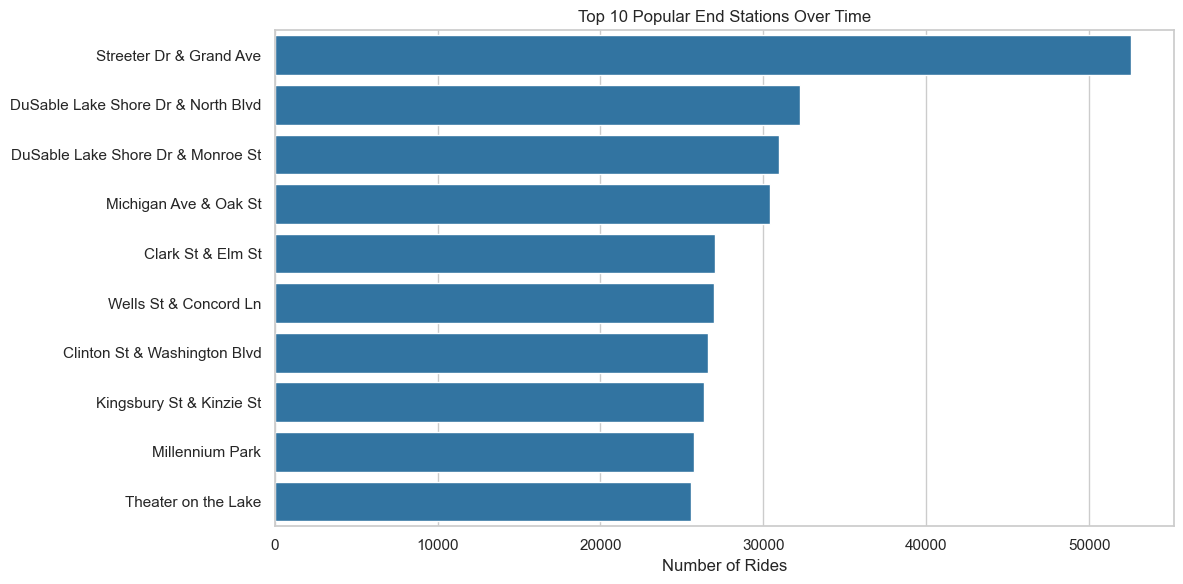

In [36]:
#Color
color_blue = '#1f77b4'

#Get the top 10 popular end stations over time
pop_end_stations = dataset['end_station_name'].value_counts().nlargest(10)

#Create bar plot for the top 10 popular end stations over time
plt.figure(figsize=(12, 6))
sns.barplot(x=pop_end_stations.values, y=pop_end_stations.index, color=color_blue)
plt.xlabel('Number of Rides')
plt.title('Top 10 Popular End Stations Over Time')
plt.tight_layout()
plt.show()

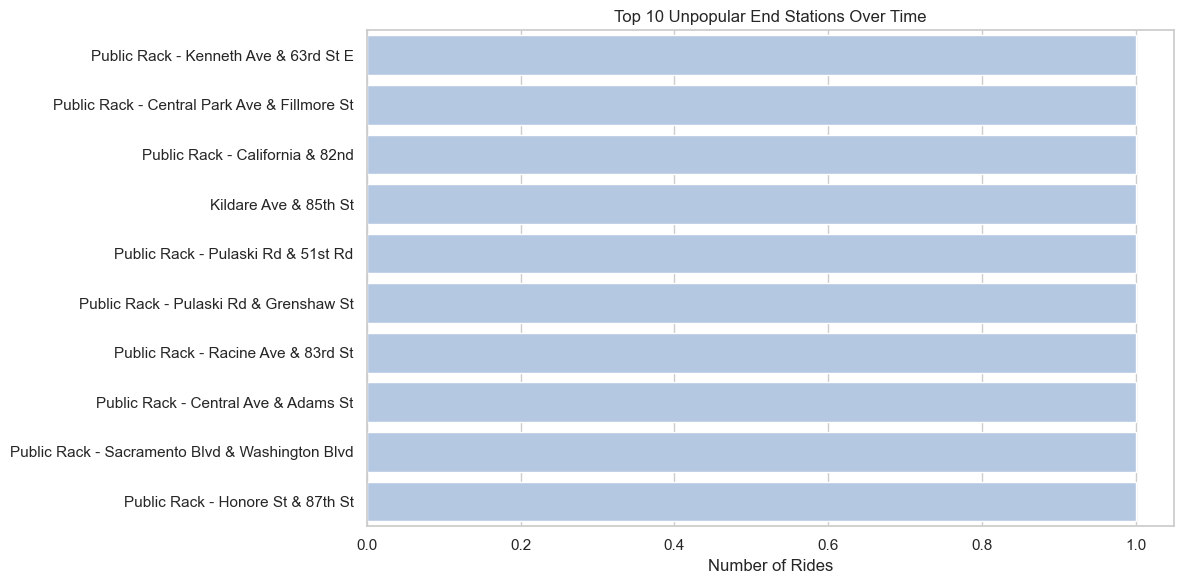

In [37]:
#Color
color_blue = '#aec7e8'

#Get the top 10 unpopular end stations over time
unpop_end_stations = dataset['end_station_name'].value_counts().nsmallest(10)

#Create bar plot for the top 10 unpopular end stations over time
plt.figure(figsize=(12, 6))
sns.barplot(x=unpop_end_stations.values, y=unpop_end_stations.index, color=color_blue)
plt.xlabel('Number of Rides')
plt.title('Top 10 Unpopular End Stations Over Time')
plt.tight_layout()
plt.show()

# 3.18. Top 10 Start Stations by User Type

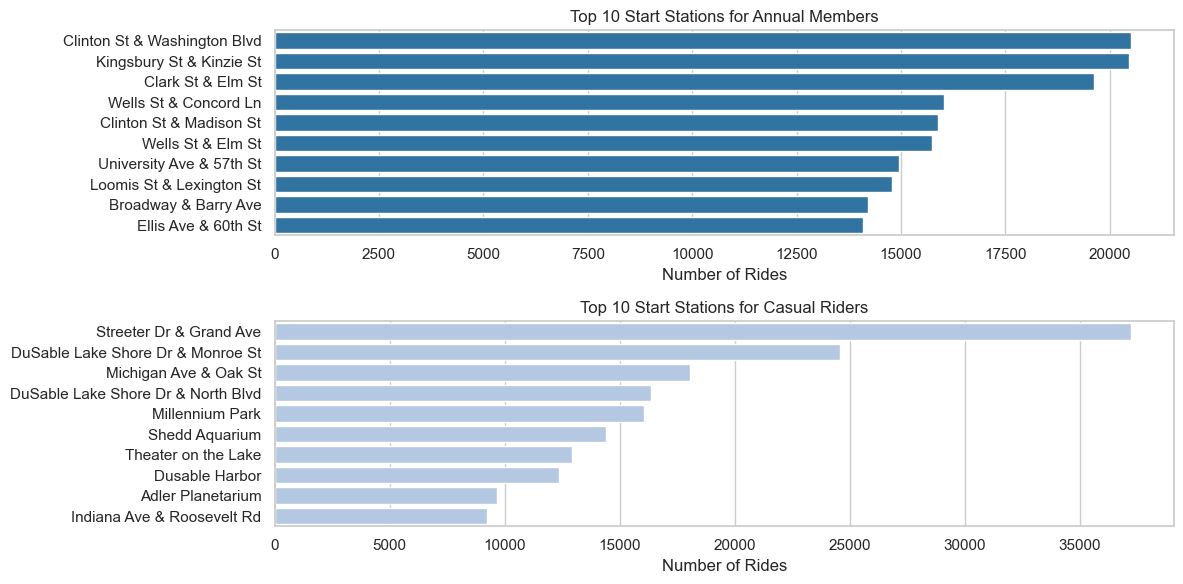

In [38]:
#Color code
color_member = '#1f77b4'
color_casual = '#aec7e8'

#Get the top 10 start stations based on the number of rides for casual riders and annual members
top_start_casual = dataset[dataset['user_type'] == 'casual']['start_station_name'].value_counts().nlargest(10)
top_start_member = dataset[dataset['user_type'] == 'member']['start_station_name'].value_counts().nlargest(10)

#Create separate bar plots for the top 10 start stations of casual riders and members
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

sns.barplot(ax=axes[0], x=top_start_member.values, y=top_start_member.index, color=color_member)
axes[0].set_xlabel('Number of Rides')
axes[0].set_title('Top 10 Start Stations for Annual Members')

sns.barplot(ax=axes[1], x=top_start_casual.values, y=top_start_casual.index, color=color_casual)
axes[1].set_xlabel('Number of Rides')
axes[1].set_title('Top 10 Start Stations for Casual Riders')

plt.tight_layout()
plt.show()

# 3.19. Top 10 End Stations by User Type

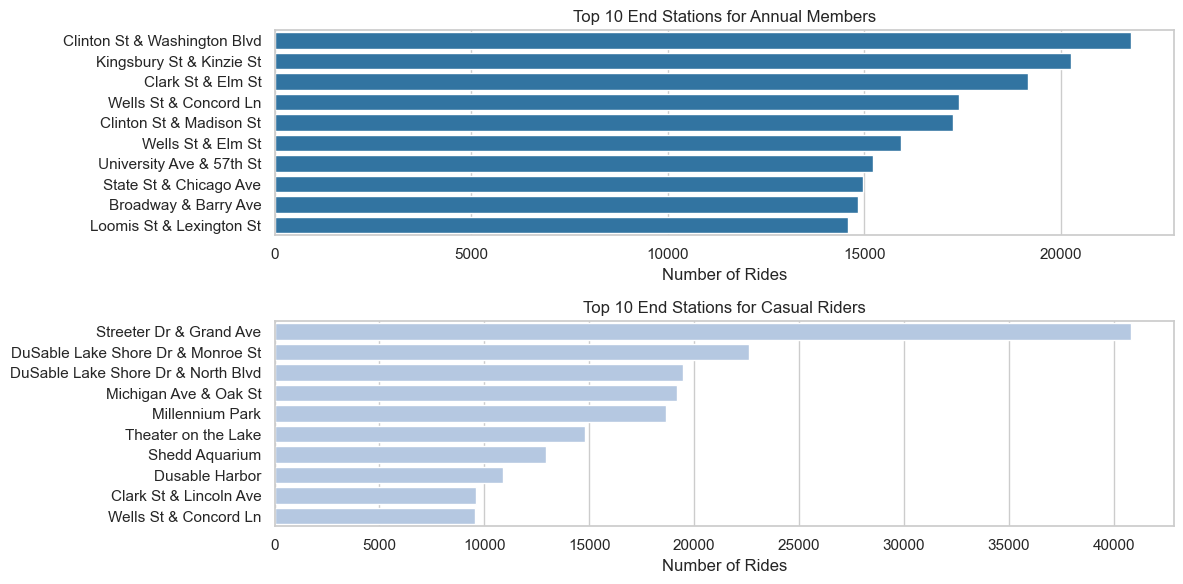

In [39]:
#Color code
color_member = '#1f77b4'
color_casual = '#aec7e8'

#Get the top 10 end stations based on the number of rides for casual riders and annual members
top_end_casual = dataset[dataset['user_type'] == 'casual']['end_station_name'].value_counts().nlargest(10)
top_end_member = dataset[dataset['user_type'] == 'member']['end_station_name'].value_counts().nlargest(10)

#Create separate bar plots for the top 10 end stations of casual riders and members
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

sns.barplot(ax=axes[0], x=top_end_member.values, y=top_end_member.index, color=color_member)
axes[0].set_xlabel('Number of Rides')
axes[0].set_title('Top 10 End Stations for Annual Members')

sns.barplot(ax=axes[1], x=top_end_casual.values, y=top_end_casual.index, color=color_casual)
axes[1].set_xlabel('Number of Rides')
axes[1].set_title('Top 10 End Stations for Casual Riders')

plt.tight_layout()
plt.show()

# 3.20. Analyzing the average of ride distance by user type

In [40]:
#Analyze the average of ride distance by user type
avg_ride_distance = dataset.groupby("user_type")["ride_distance"].mean()
df_avg_ride_distance = pd.DataFrame(avg_ride_distance).reset_index()
column_name = ["User Type", "Avg. Ride Distance (km)"]
df_avg_ride_distance.columns = column_name
df_avg_ride_distance

,User Type,Avg. Ride Distance (km)
0,casual,2.413103
1,member,2.356539


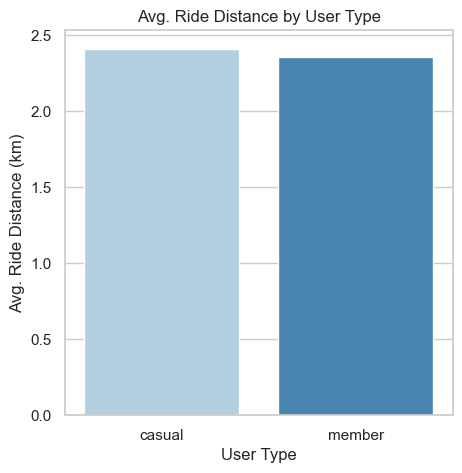

In [41]:
fig, (ax1) = plt.subplots(1, figsize=(5, 5))
sns.barplot(data = df_avg_ride_distance, x = "User Type", y = "Avg. Ride Distance (km)", ax = ax1, palette = "Blues")
ax1.set_title("Avg. Ride Distance by User Type")

plt.show()

# 3.21. Analyzing the average of ride distance by bike type

In [42]:
#Analyze the average of ride distance by bike type
avg_ride_distance = dataset.groupby("rideable_type")["ride_distance"].mean()
df_avg_ride_distance = pd.DataFrame(avg_ride_distance).reset_index()
column_name = ["Bike Type", "Avg. Ride Distance (km)"]
df_avg_ride_distance.columns = column_name
df_avg_ride_distance

,Bike Type,Avg. Ride Distance (km)
0,classic_bike,2.234144
1,docked_bike,2.393261
2,electric_bike,2.624716


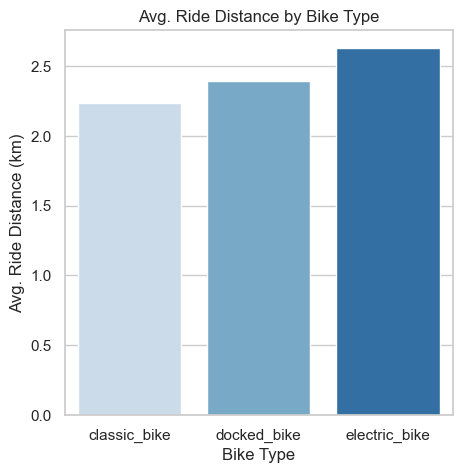

In [43]:
fig, (ax1) = plt.subplots(1, figsize=(5, 5))
sns.barplot(data = df_avg_ride_distance, x = "Bike Type", y = "Avg. Ride Distance (km)", ax = ax1, palette = "Blues")
ax1.set_title("Avg. Ride Distance by Bike Type")

plt.show()

In [44]:
#Average the number of ride distance based on bike type and user type
avg_rides_of_bike = dataset.groupby(["rideable_type", "user_type"])["ride_distance"].mean().reset_index()
avg_rides_of_bike['rideable_type'] = pd.Categorical(avg_rides_of_bike['rideable_type'])
avg_rides_of_bike = avg_rides_of_bike.sort_values(by='rideable_type')

pivot_table = avg_rides_of_bike.pivot(index='rideable_type', columns='user_type', values='ride_distance').reset_index()

pivot_table.columns = ['Bike Type', 'Casual', 'Member']

print(pivot_table)

       Bike Type    Casual    Member
0   classic_bike  2.350630  2.177611
1    docked_bike  2.393261       NaN
2  electric_bike  2.510300  2.693860


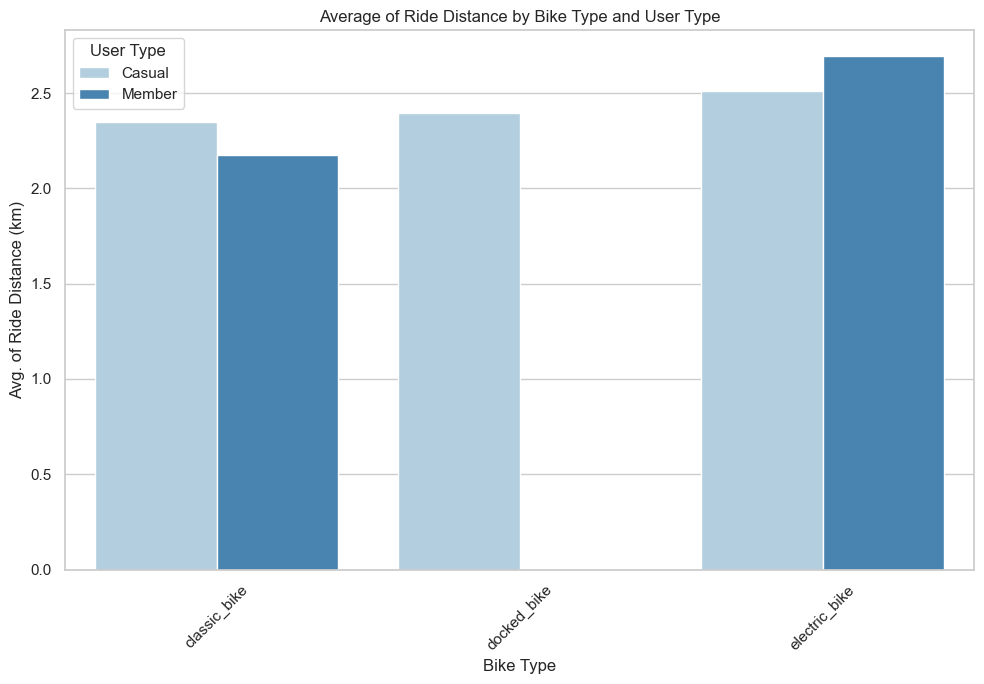

In [45]:
sns.set(style = "whitegrid")

plt.figure(figsize = (10, 7))
sns.barplot(x = 'Bike Type', y = 'Average of Ride Distance', hue = 'User Type', data = pivot_table.melt(id_vars = 'Bike Type', var_name = 'User Type', value_name = 'Average of Ride Distance'), palette = "Blues")
plt.title('Average of Ride Distance by Bike Type and User Type')
plt.xlabel('Bike Type')
plt.ylabel('Avg. of Ride Distance (km)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# 4. Adding the routes column

In [46]:
dataset['route'] = dataset['start_station_name'] + ' - ' + dataset['end_station_name']
dataset

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,start_day_num,start_day_name,day_of_year,start_month_num,start_month_name,start_year,ride_length,ride_distance,weekend,route
0,D8EEE72183269F07,classic_bike,2023-01-01 00:02:06,2023-01-01 00:29:46,Fairbanks Ct & Grand Ave,TA1305000003,New St & Illinois St,TA1306000013,41.891847,-87.620580,...,6,Sunday,1,1,January,2023,27.666667,0.244897,True,Fairbanks Ct & Grand Ave - New St & Illinois St
1,8FBD2AD70B0F6A6F,classic_bike,2023-01-01 00:04:07,2023-01-01 00:13:56,Leavitt St & Lawrence Ave,TA1309000015,Broadway & Argyle St,13108,41.968885,-87.684001,...,6,Sunday,1,1,January,2023,9.816667,2.760164,True,Leavitt St & Lawrence Ave - Broadway & Argyle St
2,B05BD052B9EBB767,electric_bike,2023-01-01 00:04:27,2023-01-01 00:16:52,Clark St & Montrose Ave,KA1503000022,Clark St & Montrose Ave,KA1503000022,41.961545,-87.666189,...,6,Sunday,1,1,January,2023,12.416667,0.017714,True,Clark St & Montrose Ave - Clark St & Montrose Ave
3,27C2A67184C49D01,electric_bike,2023-01-01 00:05:43,2023-01-01 00:21:37,Wabash Ave & Grand Ave,TA1307000117,Streeter Dr & Grand Ave,13022,41.891505,-87.626863,...,6,Sunday,1,1,January,2023,15.900000,1.649280,True,Wabash Ave & Grand Ave - Streeter Dr & Grand Ave
4,776F6B226016E50A,classic_bike,2023-01-01 00:06:03,2023-01-01 00:29:39,Fairbanks Ct & Grand Ave,TA1305000003,New St & Illinois St,TA1306000013,41.891847,-87.620580,...,6,Sunday,1,1,January,2023,23.600000,0.244897,True,Fairbanks Ct & Grand Ave - New St & Illinois St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667743,37B630E2462E2C02,electric_bike,2023-12-31 23:53:00,2024-01-01 00:27:12,Clark St & Lake St,KA1503000012,Wabash Ave & Wacker Pl,TA1307000131,41.885678,-87.631170,...,6,Sunday,365,12,December,2023,34.200000,0.586547,True,Clark St & Lake St - Wabash Ave & Wacker Pl
3667744,3FA19D78E7B8E04C,classic_bike,2023-12-31 23:53:14,2023-12-31 23:56:48,Clinton St & Madison St,TA1305000032,Franklin St & Lake St,TA1307000111,41.882752,-87.641190,...,6,Sunday,365,12,December,2023,3.566667,0.719378,True,Clinton St & Madison St - Franklin St & Lake St
3667745,722B56B75AE5844C,electric_bike,2023-12-31 23:53:47,2023-12-31 23:55:54,Michigan Ave & Lake St,TA1305000011,Michigan Ave & Lake St,TA1305000011,41.886258,-87.624602,...,6,Sunday,365,12,December,2023,2.116667,0.034611,True,Michigan Ave & Lake St - Michigan Ave & Lake St
3667746,6FB217B8B8152D9B,electric_bike,2023-12-31 23:55:28,2024-01-01 00:24:15,McClurg Ct & Ohio St,TA1306000029,Fairbanks Ct & Grand Ave,TA1305000003,41.892036,-87.616815,...,6,Sunday,365,12,December,2023,28.783333,0.419004,True,McClurg Ct & Ohio St - Fairbanks Ct & Grand Ave


# 4.1. Top 10 Routes Over Time

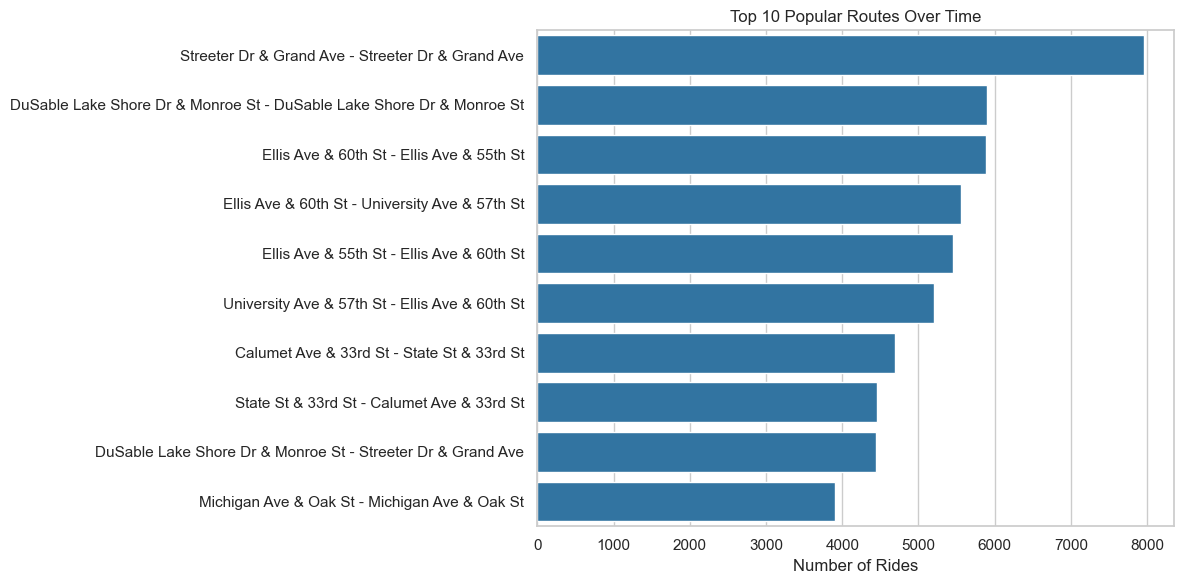

In [47]:
#Color
color_blue = '#1f77b4'

#Get the top 10 popular routes over time
pop_routes_stations = dataset['route'].value_counts().nlargest(10)

#Create bar plot for the top 10 popular routes over time
plt.figure(figsize=(12, 6))
sns.barplot(x=pop_routes_stations.values, y=pop_routes_stations.index, color=color_blue)
plt.xlabel('Number of Rides')
plt.title('Top 10 Popular Routes Over Time')
plt.tight_layout()
plt.show()

# 4.2. Bottom 10 Routes Over Time

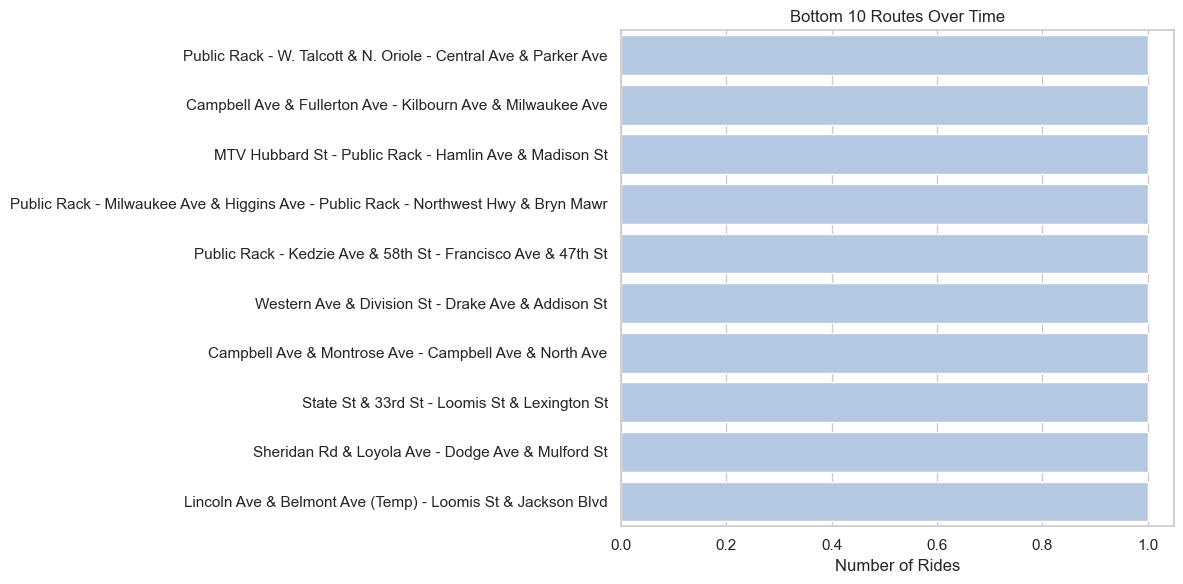

In [48]:
#Color
color_blue = '#aec7e8'

#Get the bottom 10 routes stations over time
bottom_routes_stations = dataset['route'].value_counts().nsmallest(10)

#Create bar plot for the top 10 routes stations over time
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_routes_stations.values, y=bottom_routes_stations.index, color=color_blue)
plt.xlabel('Number of Rides')
plt.title('Bottom 10 Routes Over Time')
plt.tight_layout()
plt.show()